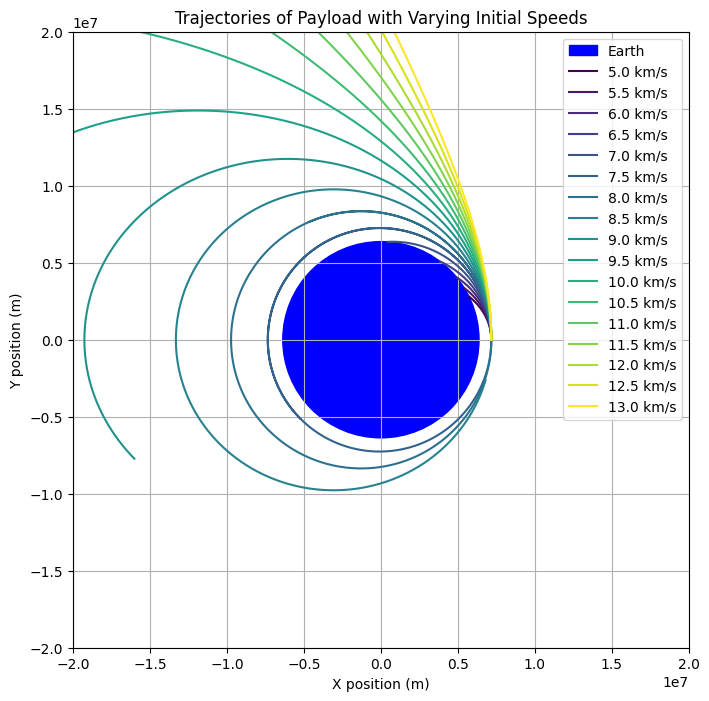

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant, m^3/kg/s^2
M_earth = 5.972e24  # mass of Earth, kg
R_earth = 6.371e6  # radius of Earth, m

# Initial parameters
altitude = 800e3  # 800 km above the surface
initial_distance = R_earth + altitude  # from the center of Earth
initial_position = np.array([initial_distance, 0])  # starting on the right side
time_step = 1  # seconds
total_time = 10000  # simulate for ~2.8 hours
num_steps = int(total_time / time_step)

# Initial velocities (km/s converted to m/s)
initial_speeds = np.arange(5e3, 13.5e3, 0.5e3)  # from 5 km/s to 13 km/s

# Storage for trajectories
trajectories = []

for v0 in initial_speeds:
    position = initial_position.copy()
    velocity = np.array([0, v0])  # launch perpendicular to the radius vector
    traj = [position.copy()]

    for _ in range(num_steps):
        r = np.linalg.norm(position)
        accel = -G * M_earth * position / r**3
        velocity += accel * time_step
        position += velocity * time_step
        if np.linalg.norm(position) < R_earth:
            break  # object has hit the Earth
        traj.append(position.copy())

    trajectories.append(np.array(traj))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
earth = plt.Circle((0, 0), R_earth, color='blue', label='Earth')
ax.add_artist(earth)

colors = plt.cm.viridis(np.linspace(0, 1, len(initial_speeds)))

for traj, v0, color in zip(trajectories, initial_speeds, colors):
    ax.plot(traj[:, 0], traj[:, 1], label=f'{v0/1e3:.1f} km/s', color=color)

ax.set_xlim(-2e7, 2e7)
ax.set_ylim(-2e7, 2e7)
ax.set_aspect('equal')
ax.set_title("Trajectories of Payload with Varying Initial Speeds")
ax.set_xlabel("X position (m)")
ax.set_ylabel("Y position (m)")
ax.legend()
plt.grid(True)
plt.show()